In [1]:
#IMporting the Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

In [2]:
house = pd.read_csv('housing-unclean.csv')
house.head()

,0.00632,18.0,2.31,0.0,0.5379999999999999,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [3]:
house = house.set_axis(['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv'],axis=1)

In [4]:
house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [5]:
house.round(4)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.0273,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.0273,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.0324,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.0690,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.0298,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,0.1588,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
601,0.1884,0.0,6.91,0.0,0.448,5.786,33.3,5.1004,3.0,233.0,17.9,396.90,14.15,20.0
602,0.3315,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
603,0.0537,0.0,13.92,0.0,0.437,6.549,51.0,5.9604,4.0,289.0,16.0,392.85,7.39,27.1


In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     553 non-null    float64
 1   zn       559 non-null    float64
 2   indus    605 non-null    float64
 3   chas     554 non-null    float64
 4   nox      605 non-null    float64
 5   rm       605 non-null    float64
 6   age      586 non-null    float64
 7   dis      605 non-null    float64
 8   rad      570 non-null    float64
 9   tax      588 non-null    float64
 10  ptratio  605 non-null    float64
 11  b        605 non-null    float64
 12  lstat    605 non-null    float64
 13  medv     605 non-null    float64
dtypes: float64(14)
memory usage: 66.3 KB


<Axes: >

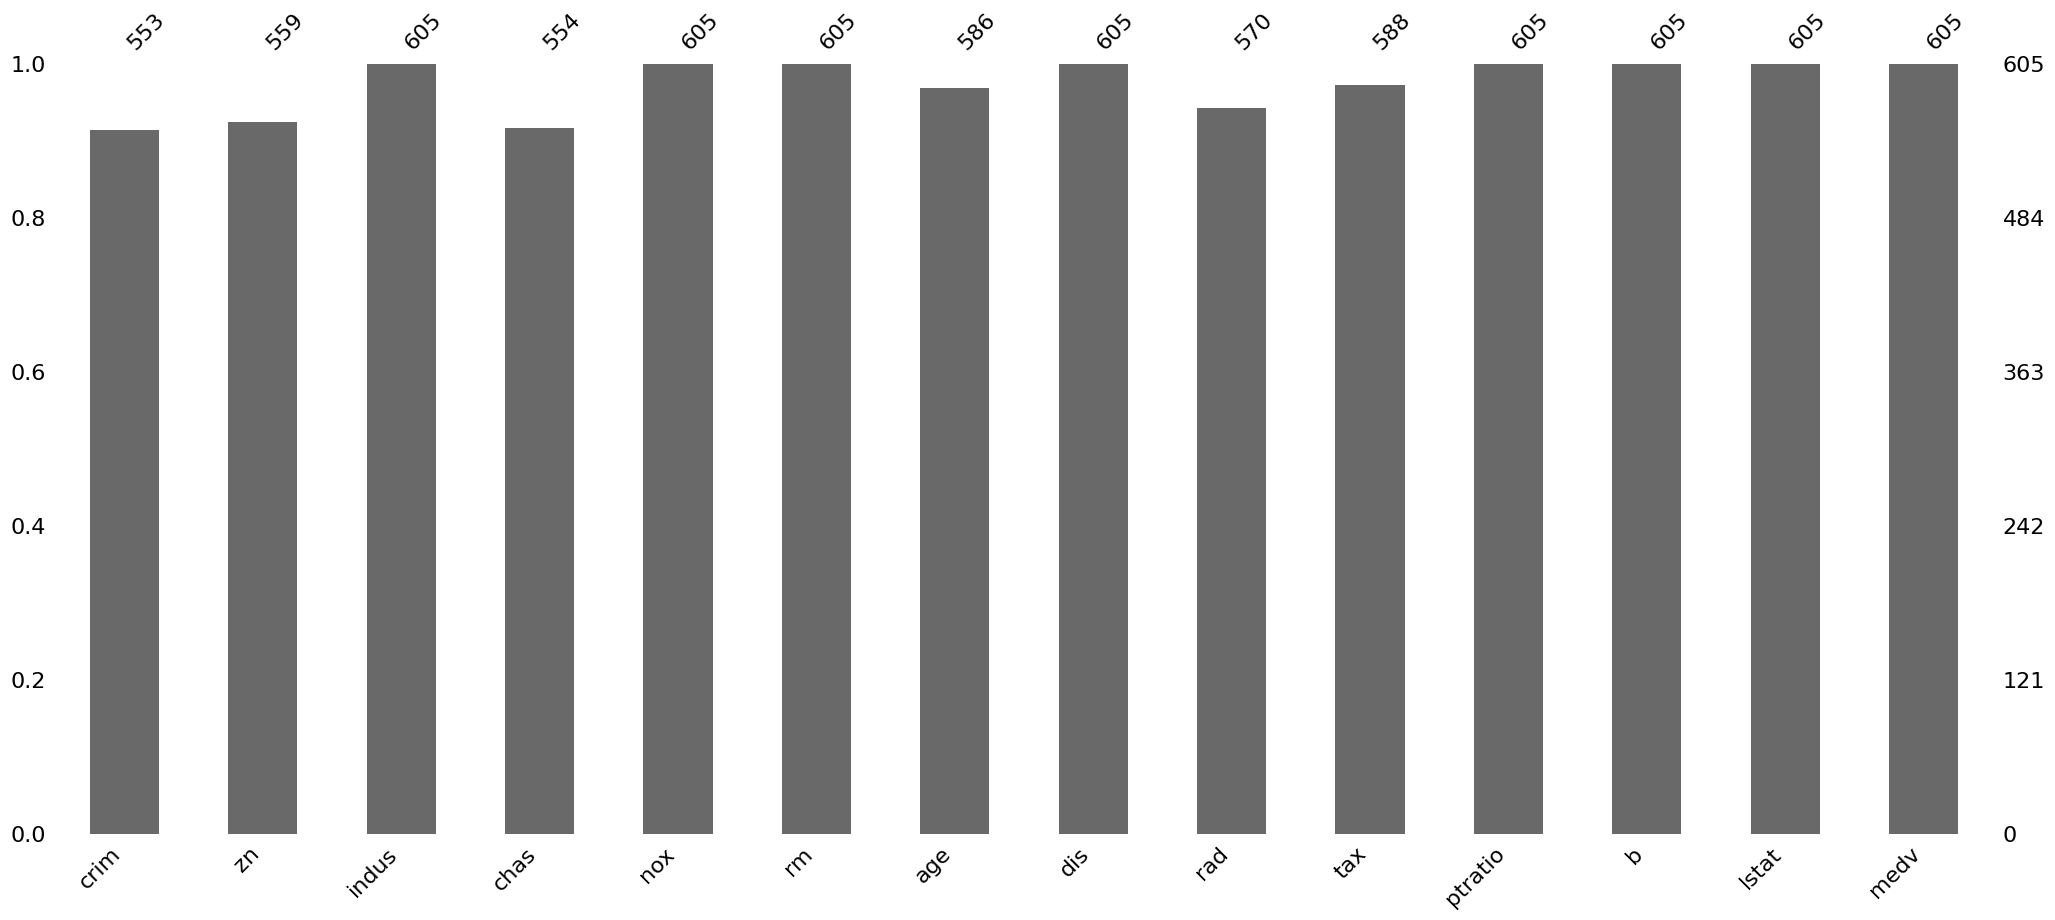

In [7]:
msno.bar(house)

In [8]:
na_features = [feature for feature in house.columns if house[feature].isnull().sum()>1]

for feature in na_features:
  print(f"{feature}:{house[feature].isna().mean()*100:.3f}%missing value")

crim:8.595%missing value
zn:7.603%missing value
chas:8.430%missing value
age:3.140%missing value
rad:5.785%missing value
tax:2.810%missing value


In [9]:
house.nunique()

,0
crim,503
zn,25
indus,75
chas,2
nox,81
rm,445
age,356
dis,411
rad,9
tax,66


In [10]:
print(house['zn'].value_counts())

zn
0.0      409
20.0      23
80.0      17
25.0      12
22.0      11
12.5      11
40.0       7
90.0       7
30.0       7
45.0       6
95.0       5
60.0       5
28.0       4
21.0       4
55.0       4
70.0       4
33.0       4
35.0       4
75.0       3
52.5       3
34.0       3
82.5       2
85.0       2
17.5       1
100.0      1
Name: count, dtype: int64


In [11]:
print(house['chas'].value_counts())

chas
0.0    515
1.0     39
Name: count, dtype: int64


In [12]:
print(house['age'].value_counts())

age
100.0    50
96.0      8
95.4      5
97.9      5
98.8      5
         ..
18.8      1
38.3      1
13.9      1
38.4      1
89.3      1
Name: count, Length: 356, dtype: int64


In [13]:
print(house['rad'].value_counts())

rad
24.0    144
4.0     130
5.0     127
3.0      42
8.0      29
6.0      29
2.0      28
1.0      22
7.0      19
Name: count, dtype: int64


In [14]:
print(house['tax'].value_counts())

tax
666.0    153
307.0     54
403.0     34
437.0     20
304.0     16
        ... 
187.0      1
313.0      1
226.0      1
469.0      1
244.0      1
Name: count, Length: 66, dtype: int64


In [16]:
print(house.shape)

(605, 14)


In [ ]:
house.dropna(inplace = True)
print(house.shape)

(553, 14)


In [17]:
house.duplicated().sum()

50

In [18]:
dup_features = [feature for feature in house.columns if house[feature].duplicated().sum()]
house[dup_features].head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [19]:
house.drop_duplicates(inplace = True)
print(house.shape)

(555, 14)


In [15]:
house.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,553.0,3.486098,8.330739,0.00906,0.08014,0.25387,3.53501,88.9762
zn,559.0,11.752236,23.859202,0.00000,0.00000,0.00000,12.50000,100.0000
indus,605.0,11.170000,6.839785,0.46000,5.19000,9.69000,18.10000,27.7400
chas,554.0,0.070397,0.256046,0.00000,0.00000,0.00000,0.00000,1.0000
nox,605.0,0.554200,0.115505,0.38500,0.44900,0.53800,0.62400,0.8710
rm,605.0,6.289079,0.736978,3.56100,5.87900,6.20800,6.63000,8.7800
age,586.0,68.540785,28.388941,2.90000,42.95000,77.80000,94.10000,100.0000
dis,605.0,3.773114,2.097383,1.12960,2.10000,3.18270,5.11800,12.1265
rad,570.0,9.392982,8.617224,1.00000,4.00000,5.00000,24.00000,24.0000
tax,588.0,407.542517,167.957983,187.00000,280.00000,330.00000,666.00000,711.0000


In [ ]:
house.skew()

,0
crim,5.218396
zn,2.225665
indus,0.292762
chas,3.401726
nox,0.727784
rm,0.405743
age,-0.599111
dis,1.011674
rad,1.002744
tax,0.666800


In [ ]:
house.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200283,0.406251,-0.056132,0.420934,-0.218978,0.352701,-0.379627,0.625396,0.582568,0.289394,-0.384839,0.455329,-0.388249
zn,-0.200283,1.000000,-0.534022,-0.042550,-0.516574,0.311835,-0.569524,0.664395,-0.311717,-0.314351,-0.391713,0.175319,-0.412894,0.360393
indus,0.406251,-0.534022,1.000000,0.062350,0.764556,-0.391330,0.645543,-0.708848,0.594167,0.720561,0.380955,-0.356506,0.602737,-0.484126
chas,-0.056132,-0.042550,0.062350,1.000000,0.091134,0.091497,0.086461,-0.099109,-0.007907,-0.035965,-0.122570,0.049040,-0.054576,0.175364
nox,0.420934,-0.516574,0.764556,0.091134,1.000000,-0.302127,0.731461,-0.769221,0.611758,0.668141,0.188918,-0.380006,0.591262,-0.427295
rm,-0.218978,0.311835,-0.391330,0.091497,-0.302127,1.000000,-0.240211,0.205170,-0.209277,-0.291680,-0.355116,0.127754,-0.613734,0.695365
age,0.352701,-0.569524,0.645543,0.086461,0.731461,-0.240211,1.000000,-0.747872,0.456232,0.506527,0.261724,-0.273486,0.602782,-0.376932
dis,-0.379627,0.664395,-0.708848,-0.099109,-0.769221,0.205170,-0.747872,1.000000,-0.494798,-0.534492,-0.232561,0.291451,-0.497277,0.249896
rad,0.625396,-0.311717,0.594167,-0.007907,0.611758,-0.209277,0.456232,-0.494798,1.000000,0.910202,0.463322,-0.444065,0.487608,-0.381690
tax,0.582568,-0.314351,0.720561,-0.035965,0.668141,-0.291680,0.506527,-0.534492,0.910202,1.000000,0.460100,-0.441505,0.543435,-0.468543


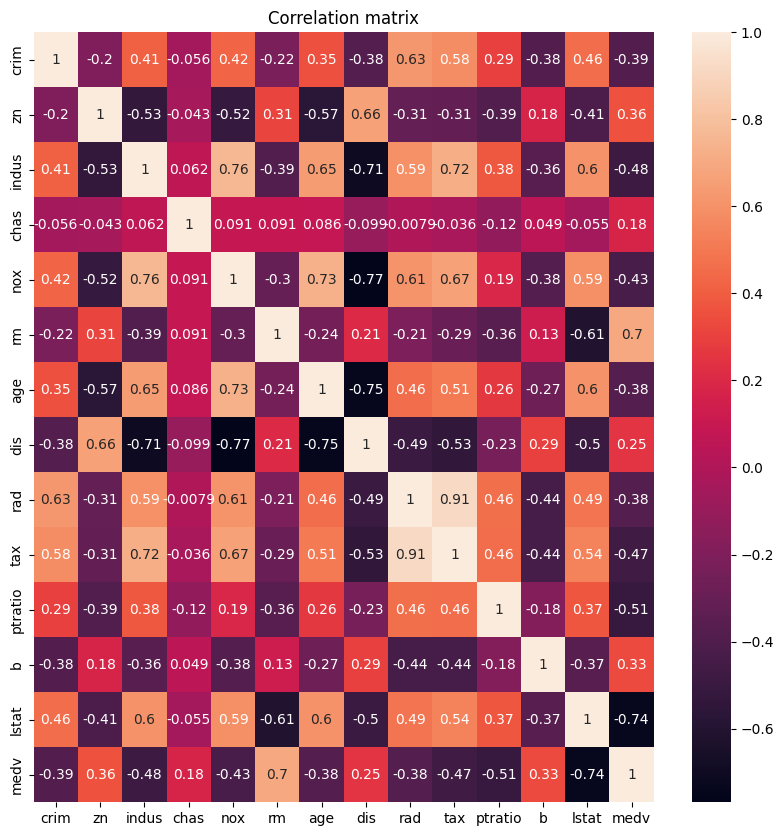

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(house.corr(),annot=True,)
plt.title("Correlation matrix")
plt.show()

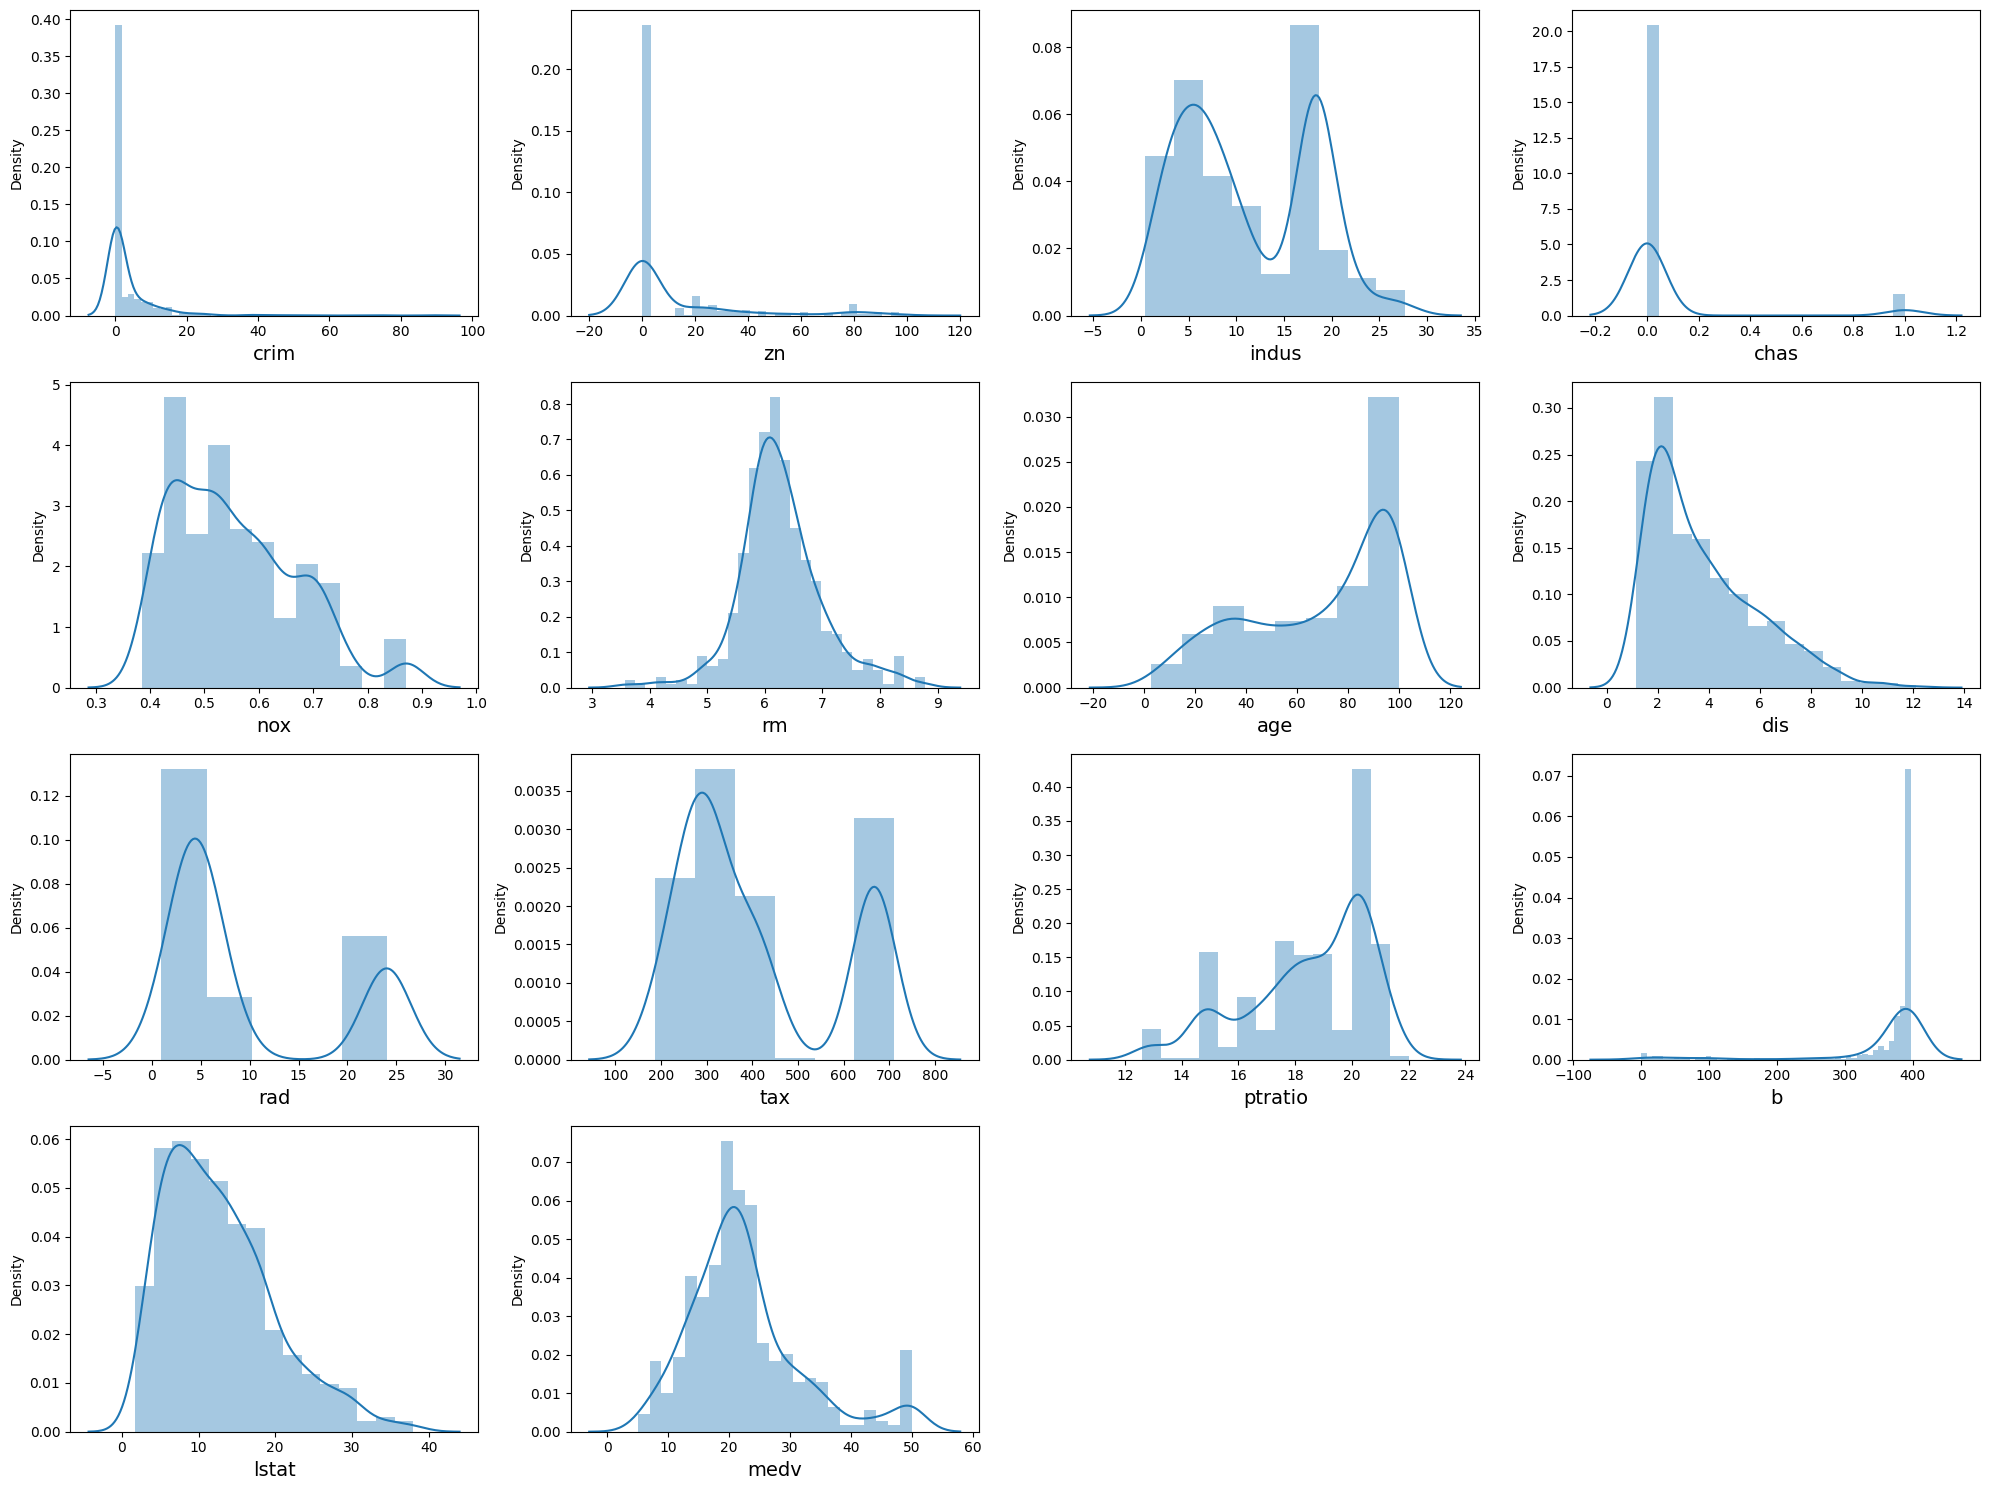

In [23]:
#Univariate Analysis

plt.figure(figsize=(20,15),facecolor='White')
plotnumber = 1

for column in house:
  if plotnumber < 16:
    ax = plt.subplot(4,4,plotnumber)
    sns.distplot(house[column])
    plt.xlabel(column,fontsize=14)
  plotnumber += 1
plt.tight_layout()

In [39]:
# Discrete Feature

discrete_feature = [feature for feature in house.columns if house[feature].nunique()<50]
print("Discrete Variables Count:{}".format(len(discrete_feature)))
house[discrete_feature].head()

Discrete Variables Count:4


,zn,chas,rad,ptratio
0,0.0,0.0,2.0,17.8
1,0.0,0.0,2.0,17.8
2,0.0,0.0,3.0,18.7
3,0.0,0.0,3.0,18.7
4,0.0,0.0,3.0,18.7


In [40]:
# Continous Feature

continous_feature = [feature for feature in house.columns if house[feature].nunique()>50]
print("Continous Variables Count:{}".format(len(continous_feature)))
house[continous_feature].head()

Continous Variables Count:10


,crim,indus,nox,rm,age,dis,tax,b,lstat,medv
0,0.02731,7.07,0.469,6.421,78.9,4.9671,242.0,396.90,9.14,21.6
1,0.02729,7.07,0.469,7.185,61.1,4.9671,242.0,392.83,4.03,34.7
2,0.03237,2.18,0.458,6.998,45.8,6.0622,222.0,394.63,2.94,33.4
3,0.06905,2.18,0.458,7.147,54.2,6.0622,222.0,396.90,5.33,36.2
4,0.02985,2.18,0.458,6.430,58.7,6.0622,222.0,394.12,5.21,28.7


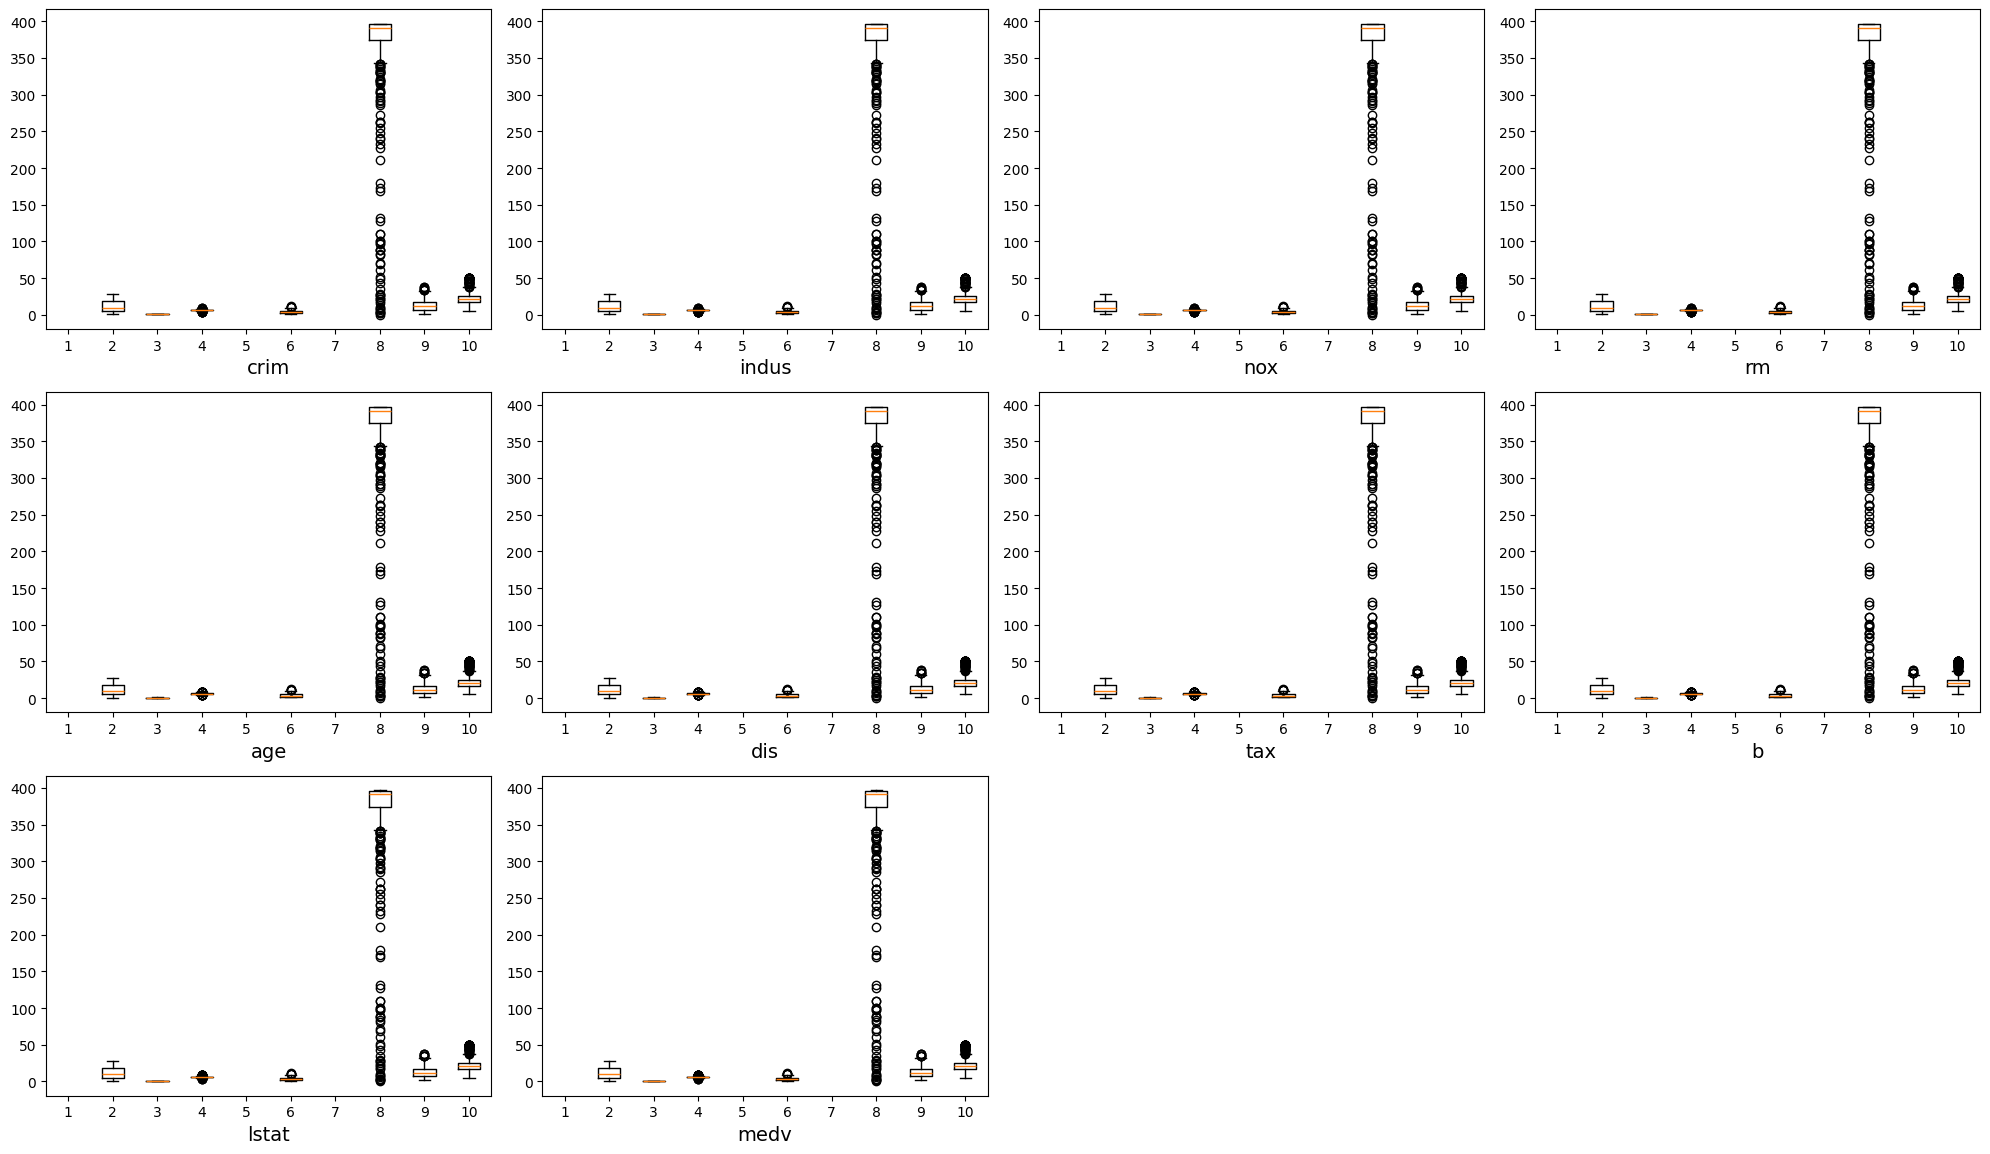

In [48]:
#Boxplot
plt.figure(figsize =(20,15))
plotnumber = 1

for column in continous_feature:
  if plotnumber < 12:
    plt.subplot(4,4,plotnumber)
    plt.boxplot(house[continous_feature])
    plt.xlabel(column,fontsize=14)
  plotnumber += 1
plt.tight_layout()

In [29]:
#Splitting data

X = house.drop(['medv'],axis =1)
y = house['medv']

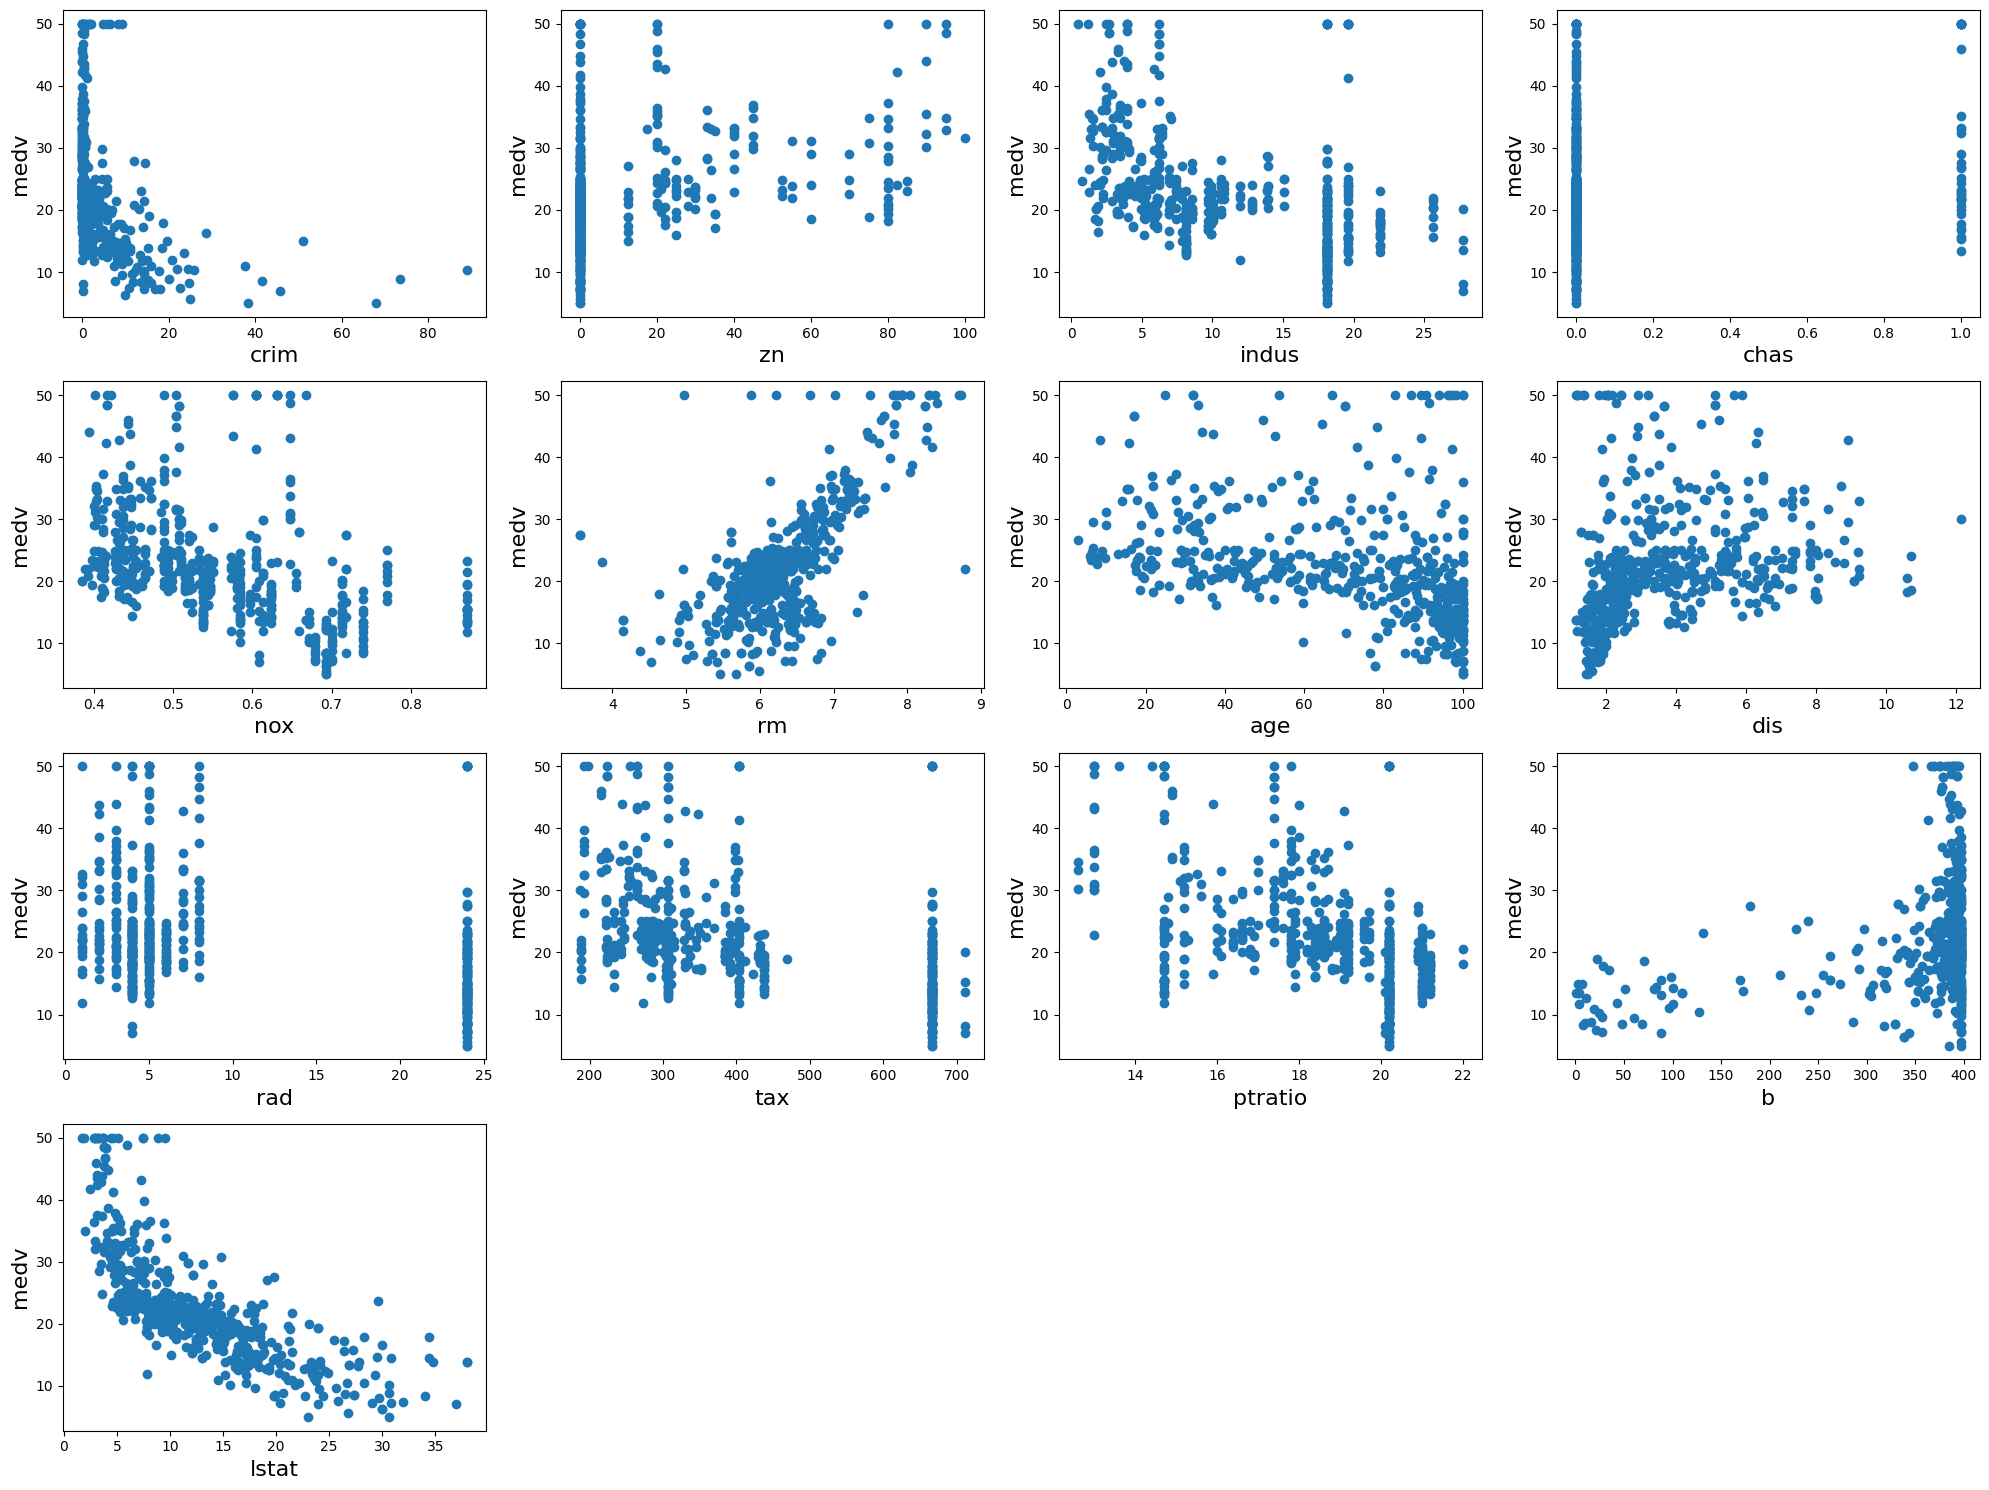

In [31]:
# Bivariate Analysis

plt.figure(figsize = (20,15), facecolor = 'white')
plotnumber = 1

for column in X:
  if plotnumber < 16:
    ax = plt.subplot(4,4,plotnumber)
    plt.scatter(X[column],y)
    plt.xlabel(column,fontsize = 16)
    plt.ylabel('medv',fontsize = 16)
  plotnumber += 1
plt.tight_layout()

(404, 13)
(101, 13)
(404,)
(101,)


In [ ]:
print(X.head())

      crim   zn  indus  chas    nox     rm   age     dis  rad    tax  ptratio  \
0  0.02731  0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
1  0.02729  0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
2  0.03237  0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
3  0.06905  0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   
4  0.02985  0.0   2.18   0.0  0.458  6.430  58.7  6.0622  3.0  222.0     18.7   

        b  lstat  
0  396.90   9.14  
1  392.83   4.03  
2  394.63   2.94  
3  396.90   5.33  
4  394.12   5.21  


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve